# Holmusk Modeling

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

os.getcwd()

'/Users/gwynethvolkmann'

In [2]:
path = '/Users/gwynethvolkmann/Downloads/Healthcare Data Challenge Data'
os.chdir(path)

In [3]:
df = pd.read_csv("holmusk_processing.csv")
df.head()

,patient_id,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,3,4,5,6,7,8,9,10,11,12
0,1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1d21f2be18683991eb93d182d6b2d220,0,0.0,0,0,0.0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df.set_index("patient_id", inplace = True)
df.head()

,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,...,3,4,5,6,7,8,9,10,11,12
patient_id,,,,,,,,,,,,,,,,,,,,,
1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1d21f2be18683991eb93d182d6b2d220,0,0.0,0,0,0.0,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
labels = df['amount']
features= df.drop('amount', axis = 1)

In [6]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [7]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (10200, 53)
Training Labels Shape: (10200,)
Testing Features Shape: (3400, 53)
Testing Labels Shape: (3400,)


## Random Forest #1 

In [8]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf.fit(train_features, train_labels)

RandomForestRegressor(random_state=42)

In [9]:
predictions = rf.predict(test_features)

errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 7256.86 degrees.


In [10]:
mape = 100 * (errors / test_labels)

print('Mean Absolute Percentage Error:', np.mean(mape))

Mean Absolute Percentage Error: 367.7340471490187


In [11]:
mse = mean_squared_error(test_labels,predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 94112584.32248816


In [12]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))

Root Mean Squared Error: 9701.164070485982


The Mean Absolute error is 7256.86, so on average the predictions of the model are about 7,000 dollars off from the actual bill amount. THis is quite a bit of error, however when considering that the total range of charges is $81,770 this is not a surprising amount of error. 

The mean absolute percentage error is very high, so there is a large amount of error and the mean squared error is also high. This model is not the best predictor of amount of the bill. I will try another algorithm. 

<AxesSubplot:>

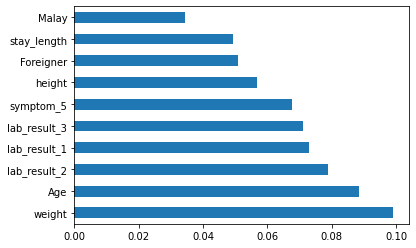

In [13]:
model = rf.fit(train_features, train_labels)
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')

## XGBoost #1

In [14]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from xgboost import plot_importance

In [15]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


In [16]:
xgbr.fit(train_features, train_labels)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [17]:
score = xgbr.score(train_features, train_labels)  
print("Training score: ", score)

Training score:  0.19595642879351982


In [18]:
scores = cross_val_score(xgbr, train_features, train_labels,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: -0.53


In [19]:
ypred = xgbr.predict(test_features)
mse = mean_squared_error(test_labels, ypred)
print("Mean Squared Error: %.2f" % mse)

Mean Squared Error: 88633726.88


In [20]:
errors = abs(ypred - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 6970.54 degrees.


This model is slightly better, the predictions are only around 6,900 dollars different from the actual bill amounts on average. The MSE is also slightly lower. These two models are not very accurate however, so I will try to improve the model by dropping all of the outliers over 20,000 dollars. 

<AxesSubplot:>

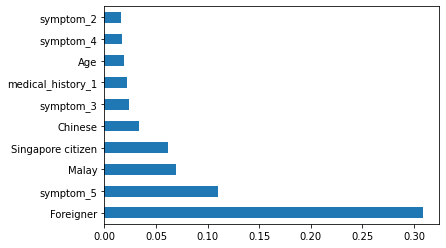

In [21]:
model = xgbr.fit(train_features, train_labels)
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Random Forest #2

In [22]:
df1 = df[df['amount'] < 20000]

In [23]:
labels = df1['amount']
features= df1.drop('amount', axis = 1)

In [24]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [25]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (9489, 53)
Training Labels Shape: (9489,)
Testing Features Shape: (3163, 53)
Testing Labels Shape: (3163,)


In [26]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf.fit(train_features, train_labels)

RandomForestRegressor(random_state=42)

In [27]:
predictions = rf.predict(test_features)

errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4605.5 degrees.


In [28]:
mape = 100 * (errors / test_labels)

print('Mean Absolute Percentage Error:', np.mean(mape))

Mean Absolute Percentage Error: 259.0186891106761


In [29]:
mse = mean_squared_error(test_labels,predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 37500679.853666425


In [30]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))

Root Mean Squared Error: 6123.779866525774


In [31]:
rf.feature_importances_

array([0.02656966, 0.00973845, 0.00860462, 0.00453362, 0.00511483,
       0.01620189, 0.01061709, 0.01154677, 0.01098799, 0.00814945,
       0.01171626, 0.00977144, 0.01062206, 0.01183903, 0.01185121,
       0.01369503, 0.01021554, 0.01961307, 0.08715074, 0.09138147,
       0.08521662, 0.10161642, 0.06449077, 0.00742903, 0.08326523,
       0.05878435, 0.01046063, 0.00486393, 0.00560805, 0.01254732,
       0.0050022 , 0.00686534, 0.00669499, 0.00661838, 0.0078998 ,
       0.00859494, 0.00799459, 0.00780951, 0.00854113, 0.00893813,
       0.00892972, 0.00835361, 0.00773323, 0.00768732, 0.00800446,
       0.00746779, 0.00762344, 0.00734962, 0.00757536, 0.00806741,
       0.00693073, 0.00716168, 0.00795405])

Removing all the data points for bill amounts that are over 20,000 dollars has improved the model quite a bit. The bill predictions are now around 4,600 dollars off from the actual bill amount. 

<AxesSubplot:>

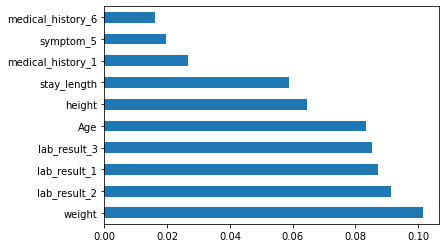

In [32]:
model = rf.fit(train_features, train_labels)
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')

The most important features in this model are weight, age, lab result 2, lab result 1, lab result 3, and symptom 5. 

## XGBoost #2

In [33]:
xgbr.fit(train_features, train_labels)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [34]:
score = xgbr.score(train_features, train_labels)  
print("Training score: ", score)

Training score:  0.18422473052896093


In [35]:
scores = cross_val_score(xgbr, train_features, train_labels,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: -0.51


In [36]:
ypred = xgbr.predict(test_features)
mse = mean_squared_error(test_labels, ypred)
print("Mean Squared Error: %.2f" % mse)

Mean Squared Error: 34439423.16


In [37]:
errors = abs(ypred - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4416.56 degrees.


This model is the best so far, with a mean absolute error of 4416.56, so the closest to the bill amount so far predicted. 

<AxesSubplot:>

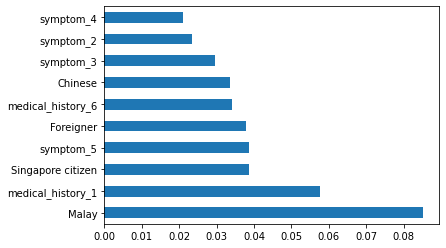

In [38]:
model = xgbr.fit(train_features, train_labels)
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')